In [87]:
import pandas as pd
import numpy as np

In [88]:
house_price = [50000,200000,140000,320000,220000,380000] # observations of the target variable 
house_size = [500, 1500, 2500, 3500, 4500, 5500] # predictor or feature 
kitchen_size = [40, 100, 200, 220, 250, 300] # predictor or feature 

In [89]:
house_data = pd.DataFrame({'house_price':house_price, 'house_size': house_size, 'kitchen_size': kitchen_size})
house_data.head()

,house_price,house_size,kitchen_size
0,50000,500,40
1,200000,1500,100
2,140000,2500,200
3,320000,3500,220
4,220000,4500,250


In [90]:
from sklearn.model_selection import train_test_split

In [91]:
features = ['house_size', 'kitchen_size'] # features names
X = house_data[features] 
Y = house_data['house_price']

In [92]:
X.head()

,house_size,kitchen_size
0,500,40
1,1500,100
2,2500,200
3,3500,220
4,4500,250


In [93]:
Y.head()

0     50000
1    200000
2    140000
3    320000
4    220000
Name: house_price, dtype: int64

In [94]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [95]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [96]:
from sklearn.linear_model import LinearRegression
my_linear_regression = LinearRegression()
my_linear_regression.fit(X_train, Y_train)

LinearRegression()

In [97]:
print("R^2 =", my_linear_regression.score(X_train, Y_train))

R^2 = 0.9379131934463928


In [98]:
print('The intercept (b_0) is  {}'.format(my_linear_regression.intercept_))
print('The coef (b_1) is  {}'.format(my_linear_regression.coef_[0]))
print('The coef (b_2) is  {}'.format(my_linear_regression.coef_[1]))

The intercept (b_0) is  -33333.333333333605
The coef (b_1) is  -311.4285714285717
The coef (b_2) is  6619.047619047625


In [99]:
house_price_pred = my_linear_regression.predict(X_test)
house_price_pred 

array([239523.80952381, 511904.76190476])

In [100]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, house_price_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, house_price_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, house_price_pred)))

Mean Absolute Error: 256190.4761904763
Mean Squared Error: 79023356009.07037
Root Mean Squared Error: 281110.93185621646


In [101]:
def MAPE(Y, pred): # MAPE: Mean Abs Percentage Error
  l1 = list(Y)
  l2 = list(pred)
  er = []
  for i in range(len(l1)):
    e = np.abs(l1[i]-l2[i])
    er.append(e/l1[i])
  return np.mean(er)

In [102]:
print('MAPE:', MAPE(Y_test, house_price_pred)*100, "%")

MAPE: 151.30683852488374 %


In [103]:
import pandas as pd
df = pd.read_csv('/content/california_housing.csv')
df.head()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


# New Section

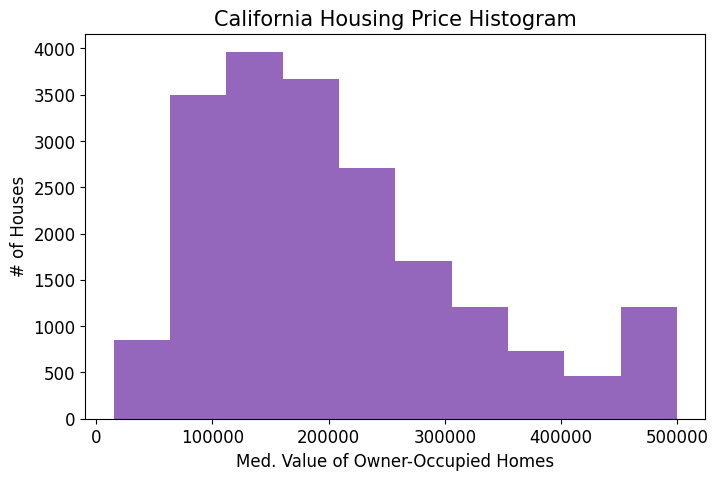

In [104]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,5))
plt.hist(df['median_house_value'], color = 'Tab:purple')
plt.title ('California Housing Price Histogram', fontsize = 15)
plt.xlabel('Med. Value of Owner-Occupied Homes', fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('# of Houses', fontsize = 12)
plt.show()

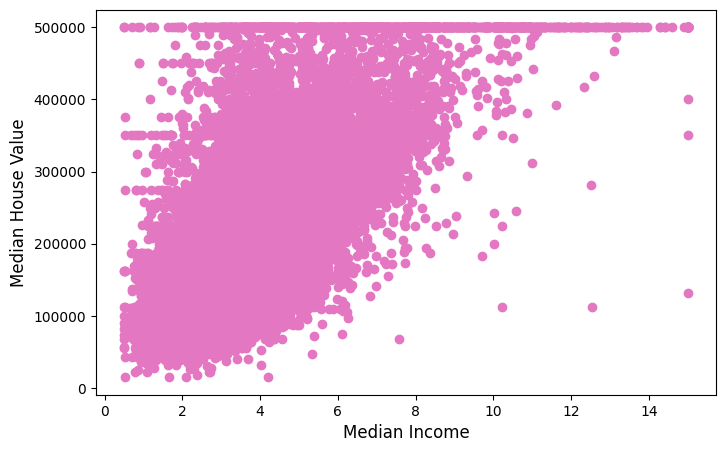

In [105]:
plt.figure(figsize = (8,5))
plt.scatter(x = df['median_income'], y = df['median_house_value'], color = 'Tab:pink')
plt.xlabel('Median Income', fontsize = 12)
plt.ylabel('Median House Value', fontsize = 12)
plt.show()

In [106]:
df.head()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [107]:
features_names = df.columns.to_list()[:-1]
x = df[features_names] 
y = df['median_house_value']

In [108]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [109]:
my_linear_regression = LinearRegression()
my_linear_regression.fit(X_train, Y_train) 

LinearRegression()

In [110]:
pred = my_linear_regression.predict(X_test)
pred

array([239523.80952381, 511904.76190476])

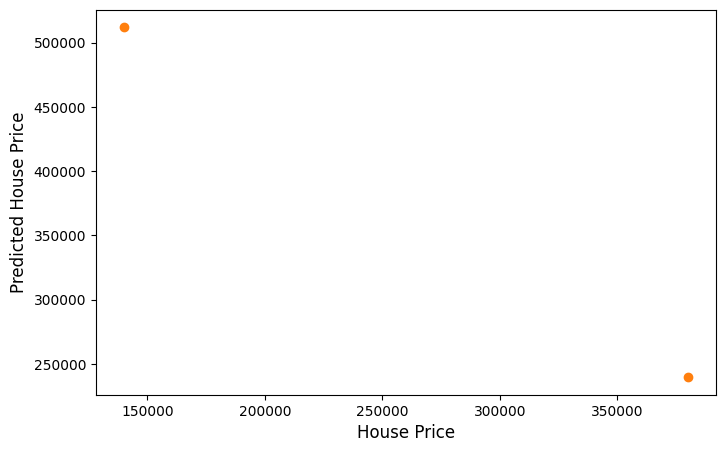

In [111]:
plt.figure(figsize = (8,5))
plt.scatter(x = Y_test, y = pred, color = 'Tab:orange')
plt.xlabel('House Price', fontsize = 12)
plt.ylabel('Predicted House Price', fontsize = 12)
plt.show()

In [112]:
print('The model r2 score is: {}'.format(my_linear_regression.score(X_train, Y_train)))

The model r2 score is: 0.9379131934463928


In [113]:
print('The intercept (b_0) is  {}'.format(my_linear_regression.intercept_))
print('The coef (b_1) is  {}'.format(my_linear_regression.coef_[0]))
print ('The coef (b_2) is {}' .format(my_linear_regression.coef_[1]))

The intercept (b_0) is  -33333.333333333605
The coef (b_1) is  -311.4285714285717
The coef (b_2) is 6619.047619047625


In [114]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print('MAPE:', MAPE(Y_test, pred)*100, "%")

Mean Absolute Error: 256190.4761904763
Mean Squared Error: 79023356009.07037
Root Mean Squared Error: 281110.93185621646
MAPE: 151.30683852488374 %


In [115]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_norm = scaler.fit_transform(df)
df_norm = pd.DataFrame(data_norm, columns = df.columns.to_list())

In [116]:
df_norm.head()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0.000000,0.229084,0.513284,0.509804,0.102359,0.102421,0.042994,0.099490,0.421277,0.679793
1,0.000059,0.602590,0.182784,0.823529,0.039752,0.047952,0.022590,0.045387,0.213728,0.332990
2,0.000118,0.651394,0.131775,0.509804,0.094556,0.078523,0.041509,0.081237,0.365064,0.526804
3,0.000176,0.596614,0.136026,0.529412,0.001713,0.002173,0.001289,0.001644,0.388684,0.649484
4,0.000235,0.466135,0.402763,0.352941,0.032661,0.037709,0.023739,0.038809,0.168108,0.137527


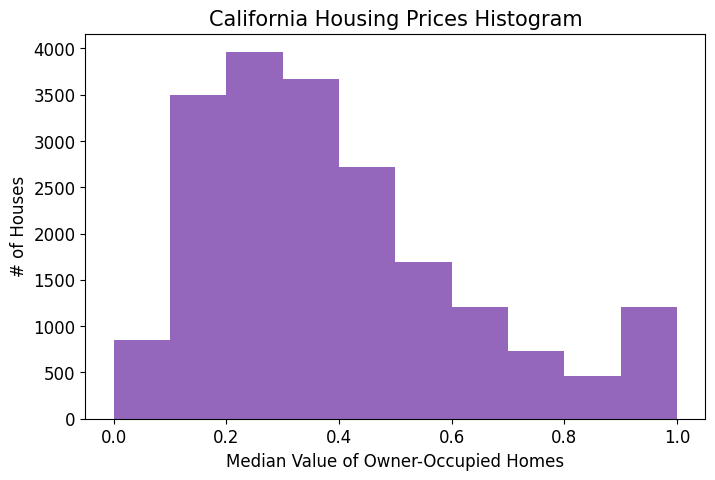

In [117]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 5))
plt.hist(df_norm.median_house_value, color = 'Tab:purple')
plt.title('California Housing Prices Histogram', fontsize = 15)
plt.xlabel('Median Value of Owner-Occupied Homes', fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('# of Houses', fontsize = 12)
plt.show()

In [118]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_norm = scaler.fit_transform(df)
df_norm = pd.DataFrame(data_norm, columns = df.columns.to_list())

**Step 2:** Fit model

In [119]:
from sklearn.linear_model import LinearRegression
my_linear_regression = LinearRegression()
X = df_norm[features_names]
df.drop([0,2])
Y = df_norm['median_house_value'] 
my_linear_regression.fit(X, Y)

LinearRegression()

**Step 3:** Extract feature importance and summarize

In [120]:
summary = pd.DataFrame({'Features':features_names, 'Scores':my_linear_regression.coef_})
summary

,Features,Scores
0,Unnamed: 0,0.032789
1,longitude,-0.852010
2,latitude,-0.829698
3,housing_median_age,0.119466
4,total_rooms,-0.637986
5,total_bedrooms,1.500604
6,population,-2.814670
7,households,0.601394
8,median_income,1.204153


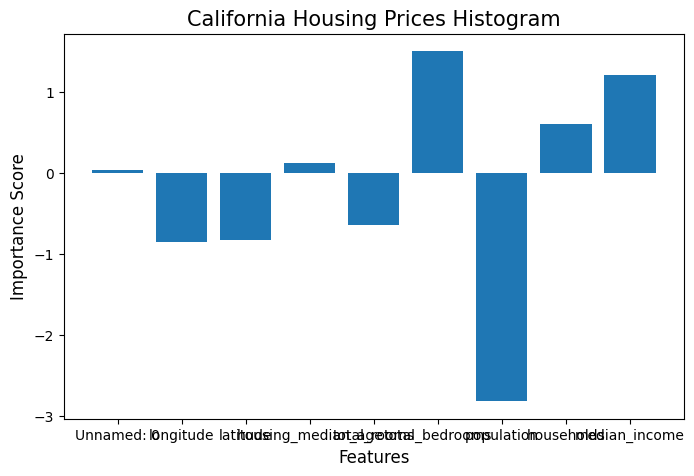

In [121]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 5))
plt.bar(x = summary['Features'], height = summary['Scores'] , color = 'Tab:blue') 
plt.title('California Housing Prices Histogram', fontsize = 15)
plt.xlabel('Features', fontsize = 12)
plt.ylabel('Importance Score', fontsize = 12)
plt.show()

As we can see, the first feature and the third feature, latitude, are close to 0, and therefore, not a great representation for the data. 